### Required packages for this analysis

In [1]:
from matplotlib import pyplot as plt
import json
from datetime import datetime as dt
import seaborn

### Read in the datasets
Dataset is personal Facebook data downloaded in JSON format

In [2]:
with open('/Volumes/Drive2/EMAT22110_Notebooks/InClass/facebook-ethanhancock94/ads_and_businesses/advertisers_who_uploaded_a_contact_list_with_your_information.json') as cl:
    contactlists = json.load(cl)
    
with open('/Volumes/Drive2/EMAT22110_Notebooks/InClass/facebook-ethanhancock94/posts/your_posts_1.json') as p:
    posts = json.load(p)

In [3]:
type(contactlists)

dict

In [4]:
contactlists.keys()

dict_keys(['custom_audiences'])

In [5]:
len(contactlists['custom_audiences'])

2805

In [6]:
namelengths = [len(x) for x in contactlists['custom_audiences']]
namelengths[:10]

[14, 31, 23, 28, 21, 19, 29, 16, 19, 22]

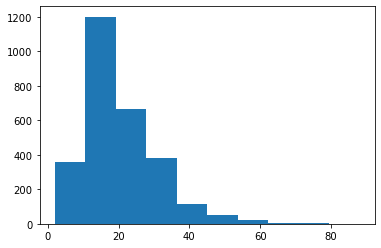

In [7]:
namelengthhist = plt.hist(namelengths)

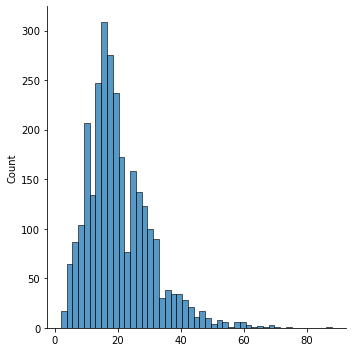

In [8]:
namelengthdist = seaborn.displot(namelengths)

In [9]:
type(posts)

list

In [16]:
posts[0].keys()

dict_keys(['timestamp', 'attachments', 'data'])

In [17]:
len(posts)

27

In [27]:
posts[0]['timestamp']

1601429221

In [31]:
a_date = dt.utcfromtimestamp(posts[0]['timestamp'])
a_date

datetime.datetime(2020, 9, 30, 1, 27, 1)

In [32]:
a_date.month, a_date.year, a_date.day

(9, 2020, 30)

In [34]:
post_dates = [dt.utcfromtimestamp(x['timestamp']) for x in posts]
post_dates[:10]

[datetime.datetime(2020, 9, 30, 1, 27, 1),
 datetime.datetime(2020, 5, 9, 23, 53, 2),
 datetime.datetime(2019, 10, 28, 20, 8, 14),
 datetime.datetime(2019, 4, 2, 21, 30, 15),
 datetime.datetime(2019, 2, 26, 22, 53, 42),
 datetime.datetime(2019, 2, 14, 19, 21, 43),
 datetime.datetime(2019, 2, 13, 1, 5, 29),
 datetime.datetime(2018, 12, 3, 14, 18, 55),
 datetime.datetime(2018, 7, 10, 14, 54, 27),
 datetime.datetime(2018, 6, 14, 22, 24, 28)]

In [35]:
post_years = [x.year for x in post_dates]
post_years[:10]

[2020, 2020, 2019, 2019, 2019, 2019, 2019, 2018, 2018, 2018]

(array([3., 3., 8., 1., 0., 0., 1., 4., 5., 2.]),
 array([2012. , 2012.8, 2013.6, 2014.4, 2015.2, 2016. , 2016.8, 2017.6,
        2018.4, 2019.2, 2020. ]),
 <BarContainer object of 10 artists>)

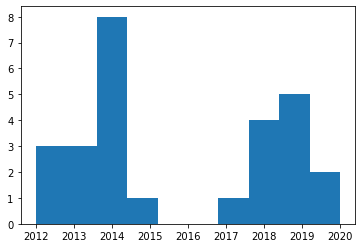

In [37]:
plt.hist(post_years)

In [39]:
import pandas as pd
posts_df = pd.DataFrame(posts)
posts_df

,timestamp,attachments,data,title,tags
0,1601429221,[],[{'update_timestamp': 1601429221}],NaN,NaN
1,1589068382,NaN,[{'post': 'Selling two computer monitors if an...,Ethan Hancock updated his status.,NaN
2,1572293294,NaN,[{'post': 'Happy Birthday! ð¥³'}],Ethan Hancock wrote on Cheyanne Pall's timeline.,NaN
3,1554240615,[{'data': [{'external_context': {'url': 'https...,[{'update_timestamp': 1554240615}],NaN,NaN
4,1551221622,[],[{'update_timestamp': 1551221622}],NaN,NaN
5,1550172103,[],[{'update_timestamp': 1550172103}],NaN,NaN
6,1550019929,NaN,[],Ethan Hancock shared a post to the group: RIT ...,NaN
7,1543846735,NaN,[{'post': 'HAPPY BIRTHDAY MOM!'}],Ethan Hancock wrote on Kathy McGrath Hancock's...,NaN
8,1531234467,NaN,[{'post': 'Happy Birthday Nathan'}],Ethan Hancock wrote on Nathan Cline's timeline.,NaN
9,1529015068,NaN,[{'post': 'Happy Birthday ðð'}],Ethan Hancock wrote on Xan McCartney's timeline.,NaN


In [42]:
posts_df['date'] = [dt.utcfromtimestamp(x) for x in posts_df['timestamp']]
posts_df

,timestamp,attachments,data,title,tags,date
0,1601429221,[],[{'update_timestamp': 1601429221}],NaN,NaN,2020-09-30 01:27:01
1,1589068382,NaN,[{'post': 'Selling two computer monitors if an...,Ethan Hancock updated his status.,NaN,2020-05-09 23:53:02
2,1572293294,NaN,[{'post': 'Happy Birthday! ð¥³'}],Ethan Hancock wrote on Cheyanne Pall's timeline.,NaN,2019-10-28 20:08:14
3,1554240615,[{'data': [{'external_context': {'url': 'https...,[{'update_timestamp': 1554240615}],NaN,NaN,2019-04-02 21:30:15
4,1551221622,[],[{'update_timestamp': 1551221622}],NaN,NaN,2019-02-26 22:53:42
5,1550172103,[],[{'update_timestamp': 1550172103}],NaN,NaN,2019-02-14 19:21:43
6,1550019929,NaN,[],Ethan Hancock shared a post to the group: RIT ...,NaN,2019-02-13 01:05:29
7,1543846735,NaN,[{'post': 'HAPPY BIRTHDAY MOM!'}],Ethan Hancock wrote on Kathy McGrath Hancock's...,NaN,2018-12-03 14:18:55
8,1531234467,NaN,[{'post': 'Happy Birthday Nathan'}],Ethan Hancock wrote on Nathan Cline's timeline.,NaN,2018-07-10 14:54:27
9,1529015068,NaN,[{'post': 'Happy Birthday ðð'}],Ethan Hancock wrote on Xan McCartney's timeline.,NaN,2018-06-14 22:24:28


In [43]:
posts_df['year'] = [x.year for x in posts_df['date']]
posts_df

,timestamp,attachments,data,title,tags,date,year
0,1601429221,[],[{'update_timestamp': 1601429221}],NaN,NaN,2020-09-30 01:27:01,2020
1,1589068382,NaN,[{'post': 'Selling two computer monitors if an...,Ethan Hancock updated his status.,NaN,2020-05-09 23:53:02,2020
2,1572293294,NaN,[{'post': 'Happy Birthday! ð¥³'}],Ethan Hancock wrote on Cheyanne Pall's timeline.,NaN,2019-10-28 20:08:14,2019
3,1554240615,[{'data': [{'external_context': {'url': 'https...,[{'update_timestamp': 1554240615}],NaN,NaN,2019-04-02 21:30:15,2019
4,1551221622,[],[{'update_timestamp': 1551221622}],NaN,NaN,2019-02-26 22:53:42,2019
5,1550172103,[],[{'update_timestamp': 1550172103}],NaN,NaN,2019-02-14 19:21:43,2019
6,1550019929,NaN,[],Ethan Hancock shared a post to the group: RIT ...,NaN,2019-02-13 01:05:29,2019
7,1543846735,NaN,[{'post': 'HAPPY BIRTHDAY MOM!'}],Ethan Hancock wrote on Kathy McGrath Hancock's...,NaN,2018-12-03 14:18:55,2018
8,1531234467,NaN,[{'post': 'Happy Birthday Nathan'}],Ethan Hancock wrote on Nathan Cline's timeline.,NaN,2018-07-10 14:54:27,2018
9,1529015068,NaN,[{'post': 'Happy Birthday ðð'}],Ethan Hancock wrote on Xan McCartney's timeline.,NaN,2018-06-14 22:24:28,2018


In [46]:
group_df = posts_df.groupby('year').count().sort_values('data', ascending = False)
group_df

,timestamp,attachments,data,title,tags,date
year,,,,,,
2014,8,0,8,8,0,8
2019,5,3,5,2,0,5
2018,4,1,4,4,0,4
2012,3,1,3,3,0,3
2013,3,1,3,2,1,3
2020,2,1,2,1,0,2
2015,1,0,1,1,0,1
2017,1,1,1,0,0,1


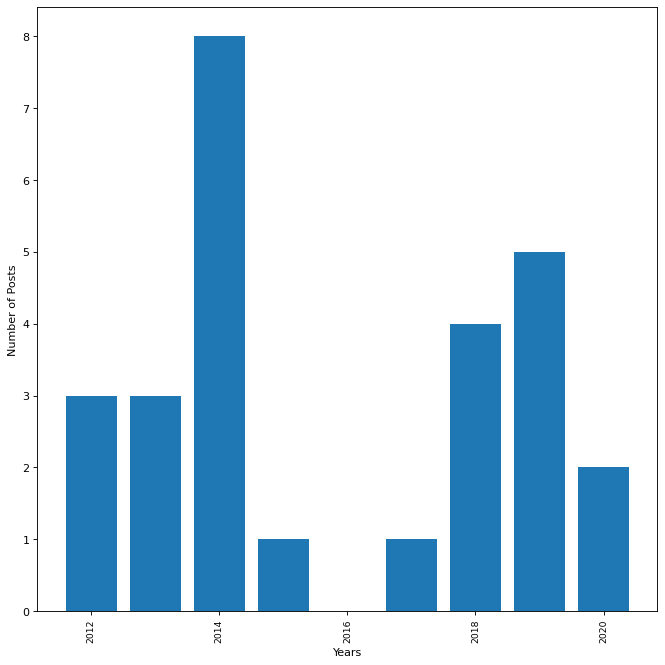

In [53]:
labels = group_df['data'].keys()
vals = group_df['data']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor ='w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_ylabel('Number of Posts')
ax.set_xlabel('Years')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

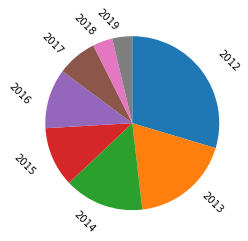

In [55]:
year = range(2012, 2020)
pieplot = plt.pie(x=group_df['data'],
                 labels = year, startangle = 90,
                 counterclock = False, labeldistance = 1.2,
                 textprops = {'rotation': -45})